<a href="https://colab.research.google.com/github/inoueshinichi/MachineLearning/blob/main/Report_PCA(%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 自作PCA

### データの読み込み

In [ ]:
import pandas as pd

# Wineデータ
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


### データセットの作成

In [ ]:
# import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 学習と検証に分割
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
# 標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)  # ※

### 分散共分散行列

In [ ]:
import numpy as np
cov_mat = np.cov(X_train_std.T) # 分散共分散行列

### 固有値と固有ベクトル

In [ ]:
# 固有値，固有ベクトルの対(一般の行列の固有値・固有ベクトルを求める)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) 
print('\n固有値 \n%s' % eigen_vals)


固有値 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [ ]:
# 固有値，固有ベクトルの対(エルミート（or 実対称）行列の固有値・固有ベクトルを求める)
eigenH_vals, eigenH_vecs = np.linalg.eigh(cov_mat)
print('\n固有値H \n%s' % eigenH_vals)


固有値H 
[0.10754642 0.15362835 0.1808613  0.21357215 0.3131368  0.34650377
 0.51828472 0.6620634  0.84166161 0.96120438 1.54845825 2.41602459
 4.84274532]


In [ ]:
eigenH_vecs

array([[-9.44869777e-02, -1.27834515e-01,  2.62834263e-01,
         3.74638877e-01,  3.98377017e-01, -3.68176414e-01,
         7.90529293e-02, -2.99096847e-01, -2.90625226e-01,
        -3.29610003e-03,  1.37748734e-01,  5.03034778e-01,
        -1.37242175e-01],
       [ 2.63652406e-02,  8.06401578e-02, -2.66769211e-01,
        -1.37405597e-01, -1.10458230e-01, -1.25775752e-02,
        -2.74002014e-01, -6.27036396e-01,  8.95378697e-02,
         5.62646692e-01, -9.61503863e-02,  1.64871190e-01,
         2.47243265e-01],
       [ 1.42747511e-01,  1.67924873e-02, -1.15542548e-01,
         4.61583035e-01, -3.82496856e-01,  1.77578177e-01,
         1.32328045e-01, -3.89128239e-04, -1.60834991e-01,
        -1.08977111e-01, -6.77775667e-01,  2.44564761e-01,
        -2.54515927e-02],
       [-1.30485780e-01, -1.10845657e-01,  1.99483410e-01,
        -4.18953989e-01,  2.43373853e-01, -4.40592110e-01,
         2.23999097e-01,  4.05836452e-02,  5.15873402e-02,
         3.38187002e-02, -6.25040550e

### 各固有ベクトル方向の寄与率(分散説明率)

In [ ]:
# 寄与率（分散説明率）
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

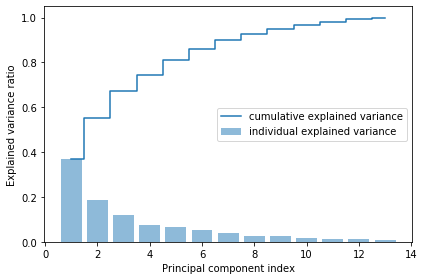

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# 上位2個の固有値に対応する固有ベクトルで次元削減用の変換行列を作る
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# 固有値でソート
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
# 最上位の固有ベクトル
eigen_pairs[0][1]

array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])

In [ ]:
# 固有ベクトルの形状変換
eigen_pairs[0][1][:, np.newaxis]

array([[-0.13724218],
       [ 0.24724326],
       [-0.02545159],
       [ 0.20694508],
       [-0.15436582],
       [-0.39376952],
       [-0.41735106],
       [ 0.30572896],
       [-0.30668347],
       [ 0.07554066],
       [-0.32613263],
       [-0.36861022],
       [-0.29669651]])

In [ ]:
# 次元削減用の変換行列を作成
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print("Matrix W(13x2):\n", w)

Matrix W(13x2):
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


### 次元削減

In [ ]:
# １サンプル(1x13)->(1x2)に変換
print("X_train_std[0]: \n{}".format(X_train_std[0]))
print("X_train_std[0].dot(w): \n{}".format(X_train_std[0].dot(w)))

X_train_std[0]: 
[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
 -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
 -0.62946362]
X_train_std[0].dot(w): 
[2.38299011 0.45458499]


In [ ]:
# トレーニングサンプル全体を(nx2)に変換
X_train_pca = X_train_std.dot(w)
print(X_train_pca[:5])

[[ 2.38299011  0.45458499]
 [-1.96578183  1.65376939]
 [-2.53907598  1.02909066]
 [-1.43010776  0.6024011 ]
 [ 3.14147227  0.66214979]]


### 次元削減した学習データをプロット

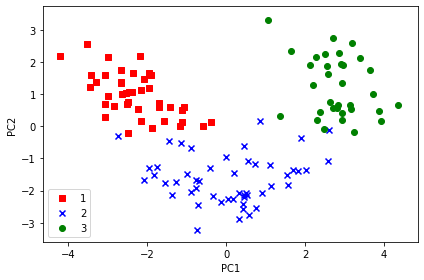

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# scikit-learn PCA

/Users/inoueshinichi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/inoueshinichi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
No handles with labels found to put in legend.


[3 1 1 1 3 2 2 3 2 2 2 1 2 3 1 3 2 1 3 3 2 1 2 2 2 2 3 1 2 3 1 1 3 1 2 1 1
 2 3 3 1 3 3 3 1 2 3 3 2 3 2 2 2 1 2 2 3 3 2 1 1 2 3 3 2 1 2 2 2 1 1 1 1 1
 3 1 1 3 2 2 3 1 2 1 2 3 3 2 1 1 1 3 2 1 1 2 2 3 3 2 1 1 2 2 3 1 3 1 2 2 2
 2 1 3 1 1 1 1 2 2 3 3 2 2]
[1 2 1 1 2 3 2 3 1 3 1 2 3 1 3 3 2 1 3 1 1 3 2 2 2 2 1 3 3 2 1 3 1 2 2 1 2
 2 1 3 3 2 2 2 1 2 2 3 2 3 2 2 1 2]


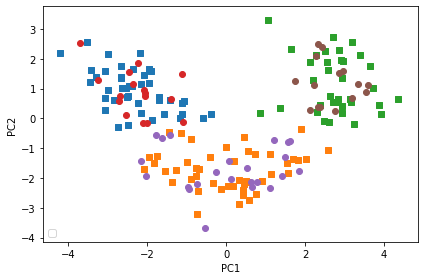

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# PCA
scikit_pca = PCA(n_components=2)
X_train_scikit_pca = scikit_pca.fit_transform(X_train_std)
X_test_scikit_pca = scikit_pca.transform(X_test_std)

# Logistic Regression
lr = LogisticRegression()

# fit
lr.fit(X_train_scikit_pca, y_train)

# Predict
y_train_lr = lr.predict(X_train_scikit_pca)
y_test_lr = lr.predict(X_test_scikit_pca)

print(y_train_lr)
print(y_test_lr)

# 学習データ
plt.scatter(X_train_scikit_pca[y_train_lr==1, 0], X_train_scikit_pca[y_train_lr==1, 1], marker='s')
plt.scatter(X_train_scikit_pca[y_train_lr==2, 0], X_train_scikit_pca[y_train_lr==2, 1], marker='s')
plt.scatter(X_train_scikit_pca[y_train_lr==3, 0], X_train_scikit_pca[y_train_lr==3, 1], marker='s')

# テストデータ
plt.scatter(X_test_scikit_pca[y_test_lr==1, 0], X_test_scikit_pca[y_test_lr==1, 1], marker='o')
plt.scatter(X_test_scikit_pca[y_test_lr==2, 0], X_test_scikit_pca[y_test_lr==2, 1], marker='o')
plt.scatter(X_test_scikit_pca[y_test_lr==3, 0], X_test_scikit_pca[y_test_lr==3, 1], marker='o')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### 寄与率の表示

In [ ]:
# 寄与率を見るためにn_components = None
all_pca = PCA(n_components=None)

# 適合
X_train_all_pca = all_pca.fit_transform(X_train_std)

# 寄与率
all_pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])